### 1. Visualization

In [1]:
from datascience import *
import matplotlib

matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
np.set_printoptions(threshold=50)

In [2]:
actors = Table.read_table('https://raw.githubusercontent.com/yu-to-chen/data-science/master/assets/data/actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


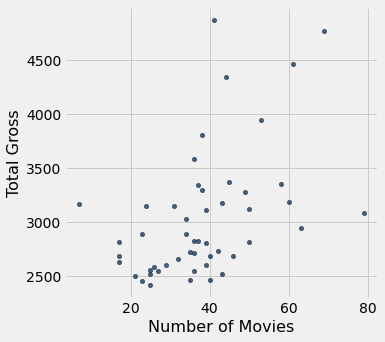

In [3]:
actors.scatter('Number of Movies', 'Total Gross')

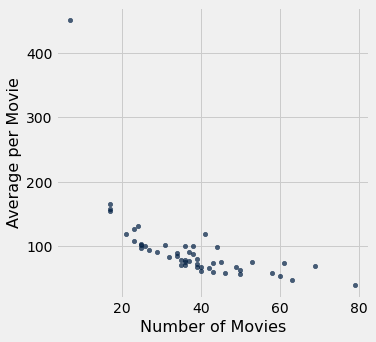

In [4]:
actors.scatter('Number of Movies', 'Average per Movie')

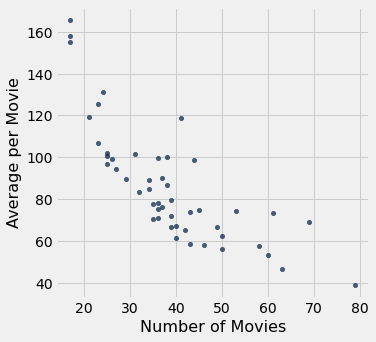

In [7]:
no_outlier = actors. where('Number of Movies', are.above(10))
no_outlier.scatter('Number of Movies', 'Average per Movie')

In [8]:
actors.where('Number of Movies', are.above(60))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Robert DeNiro,3081.3,79,39,Meet the Fockers,279.3
Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


In [10]:
actors.where('Number of Movies', are.below(10))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


In [11]:
movies_by_year = Table.read_table("https://raw.githubusercontent.com/yu-to-chen/data-science/master/assets/data/movies_by_year.csv")
movies_by_year

Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
2007,9663.8,631,Spider-Man 3
2006,9209.5,608,Dead Man's Chest


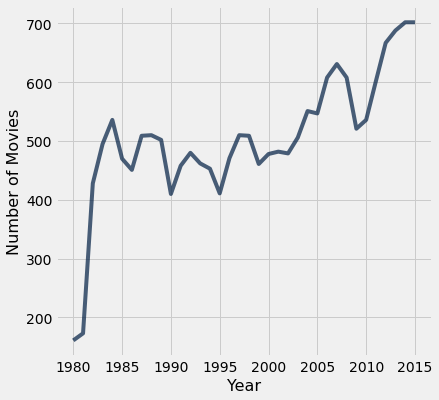

In [12]:
movies_by_year.plot('Year', 'Number of Movies')

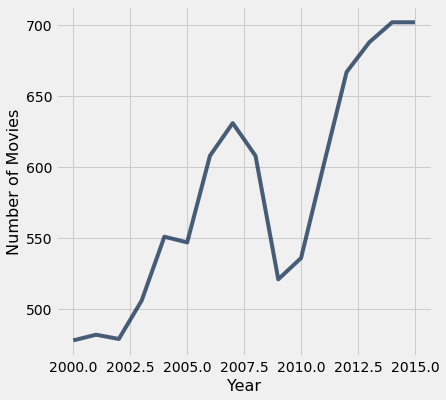

In [14]:
century_21 = movies_by_year.where('Year', are.above(1999))
century_21.plot('Year', 'Number of Movies')

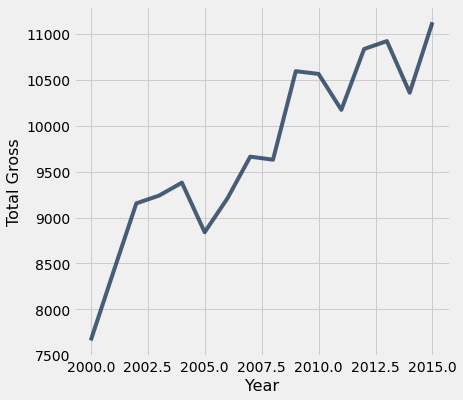

In [15]:
century_21.plot('Year', 'Total Gross')

In [16]:
century_21.where('Year', are.equal_to(2009))

Year,Total Gross,Number of Movies,#1 Movie
2009,10595.5,521,Avatar


### 2. Visualizing Categorical Distributions

In [17]:
from datascience import *
import matplotlib

matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
np.set_printoptions(threshold=50)

In [20]:
icecream = Table().with_columns(
    'Flavor', make_array('Chocolate', 'Strawberry', 'Vanilla'),
    'Number of Cartons', make_array(16, 5, 9)
)
icecream

Flavor,Number of Cartons
Chocolate,16
Strawberry,5
Vanilla,9


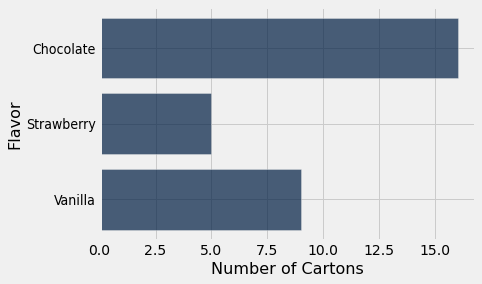

In [21]:
icecream.barh('Flavor', 'Number of Cartons')

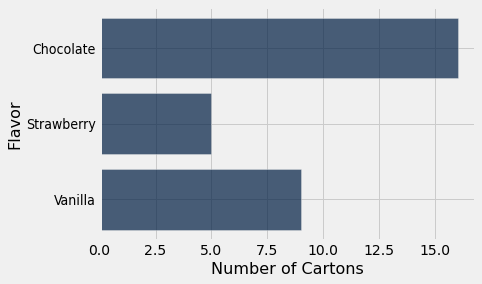

In [22]:
icecream.barh('Flavor')

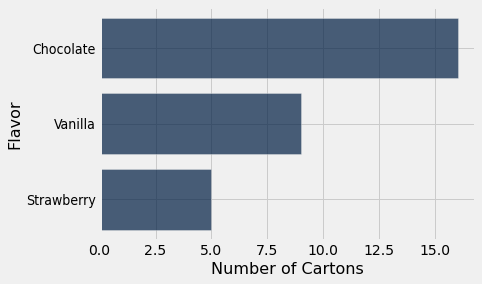

In [23]:
icecream.sort('Number of Cartons', descending=True).barh('Flavor')

In [24]:
top = Table.read_table('https://raw.githubusercontent.com/yu-to-chen/data-science/master/assets/data/top_movies_2017.csv')
top

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [25]:
movies_and_studios = top.select('Title', 'Studio')

In [27]:
studio_distribution = movies_and_studios.group('Studio')
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [28]:
sum(studio_distribution.column('count'))

200

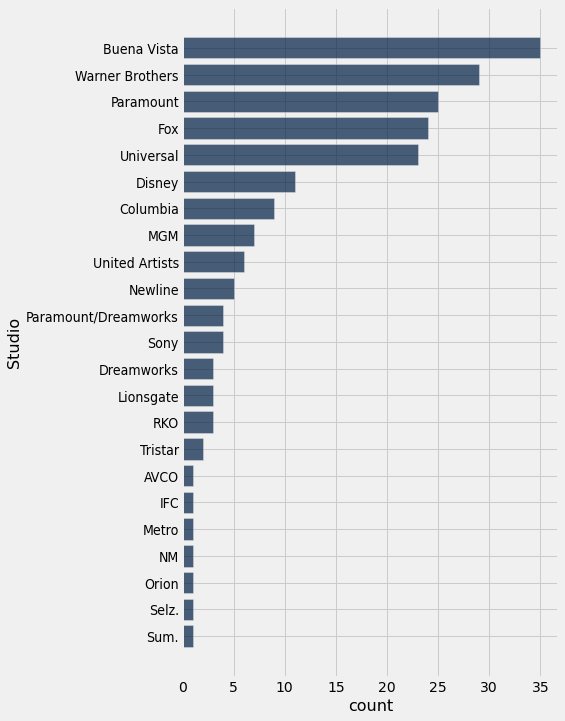

In [29]:
studio_distribution.sort('count', descending=True).barh('Studio')

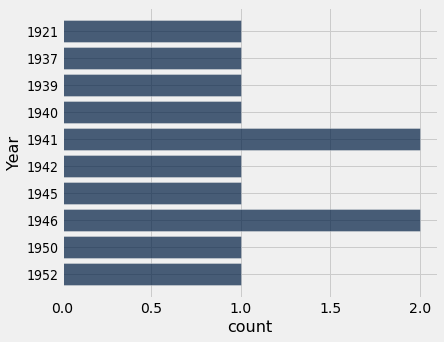

In [32]:
movies_and_years = top.select('Title', 'Year')
movies_and_years.group('Year').take(np.arange(10)).barh('Year')

### 3. Visualizing Numerical Distributions

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
top = Table.read_table('https://raw.githubusercontent.com/yu-to-chen/data-science/master/assets/data/top_movies_2017.csv')
top.set_format([2,3], NumberFormatter)

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939
Star Wars,Fox,"460,998,007","1,583,483,200",1977
The Sound of Music,Fox,"158,671,368","1,266,072,700",1965
E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
Titanic,Paramount,"658,672,302","1,204,368,000",1997
The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
Jaws,Universal,"260,000,000","1,138,620,700",1975
Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973
Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937


In [5]:
millions = top.select('Title').with_columns('Adjusted Gross', np.round(top.column(3)/1e6, 2))
millions

Title,Adjusted Gross
Gone with the Wind,1796.18
Star Wars,1583.48
The Sound of Music,1266.07
E.T.: The Extra-Terrestrial,1261.08
Titanic,1204.37
The Ten Commandments,1164.59
Jaws,1138.62
Doctor Zhivago,1103.56
The Exorcist,983.23
Snow White and the Seven Dwarves,969.01


In [9]:
adj_gross = millions.column('Adjusted Gross')
min(adj_gross), max(adj_gross)

(338.41000000000003, 1796.1800000000001)

In [26]:
bin_counts = millions.bin('Adjusted Gross', bins=np.arange(300, 1801, 100))
bin_counts.show()

bin,Adjusted Gross count
300,68
400,60
500,32
600,15
700,7
800,7
900,3
1000,0
1100,3
1200,3


The last bin is 1700-1800, which is not 1700-1799. And the Last row is always 0!

In [50]:
millions.bin('Adjusted Gross').show()

bin,Adjusted Gross count
338.41,115
484.187,50
629.964,14
775.741,10
921.518,3
1067.3,4
1213.07,2
1358.85,0
1504.63,1
1650.4,1


In [51]:
millions.bin('Adjusted Gross', bins = 4)

bin,Adjusted Gross count
338.41,177
702.852,15
1067.3,6
1431.74,2
1796.18,0


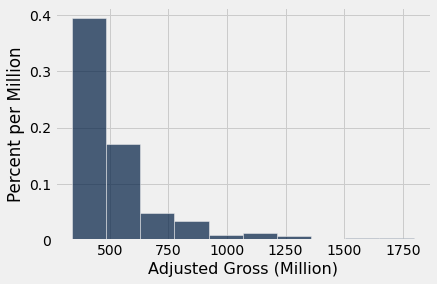

In [54]:
millions.hist('Adjusted Gross', unit = 'Million')

In [55]:
bin_counts.show(3)

bin,Adjusted Gross count
300,68
400,60
500,32


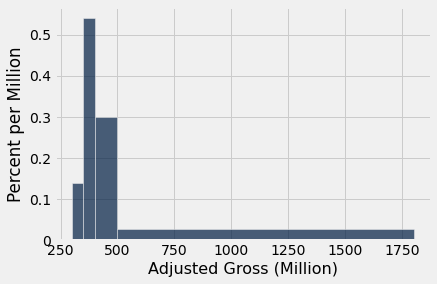

In [56]:
uneven = make_array(300,350,400,500,1800)
millions.hist('Adjusted Gross', bins=uneven, unit='Million')

In [57]:
millions.bin('Adjusted Gross', bins=uneven)

bin,Adjusted Gross count
300,14
350,54
400,60
500,72
1800,0


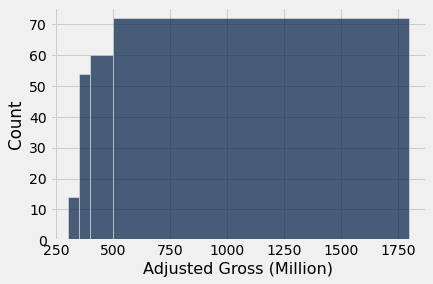

In [59]:
# misrepresented data
millions.hist('Adjusted Gross', bins=uneven, unit='Million', normed=False)

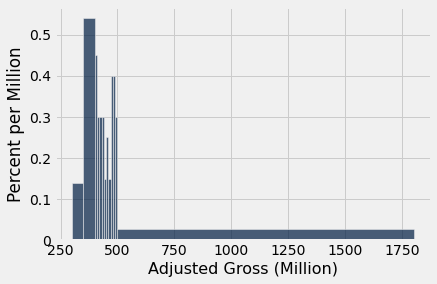

In [60]:
some_tiny_bins = make_array(300, 350, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 1800)
millions.hist('Adjusted Gross', bins=some_tiny_bins, unit='Million')

In [62]:
hitogram_elements = millions.bin("Adjusted Gross", bins=uneven).relabeled(1, "count")
hitogram_elements

bin,count
300,14
350,54
400,60
500,72
1800,0
